## Tutorial notebook on how to use the CLMS Data Store and its `preload_data` method for `EEA pre-packaged` datasets from the `CLMS API`

This notebook shows the preloading of pre-packaged EEA datasets from the CLMS API that is then converted to `.zarr` for efficient processing.

### Setup
In order to run this notebook, you need to install [`xcube_clms`](https://github.com/xcube-dev/xcube-clms). You can install it following either of the steps below:

1. via `conda-forge`
```bash
conda env create -f environment.yml
conda activate xcube-clms
conda install xcube-clms
```

2. via Development mode

```bash
git clone https://github.com/xcube-dev/xcube-clms.git
cd xcube-clms
conda env create -f environment.yml
conda activate xcube-clms
pip install .
```


Note that [`xcube_clms`](https://github.com/xcube-dev/xcube-clms) is a plugin of [`xcube`](https://xcube.readthedocs.io/en/latest/), where `xcube` is included in the `environment.yml`.  

You also need the credentials from the Land Monitoring service. Please follows the steps outlined [`here`](https://eea.github.io/clms-api-docs/authentication.html) to download your credentials and place them in the same directory as this notebook.

In [1]:
%%time
import json

from xcube.core.store import new_data_store

CPU times: user 2.55 s, sys: 296 ms, total: 2.85 s
Wall time: 1.52 s


To get the credentials.json, please follow the steps outlined [here](https://eea.github.io/clms-api-docs/authentication.html)

In [2]:
%%time
json_file_path = "credentials.json"
with open(json_file_path, "r") as j:
    credentials = json.loads(j.read())

CPU times: user 792 μs, sys: 1.1 ms, total: 1.89 ms
Wall time: 9.7 ms


When the user creates a new CLMS data store, it already sends requests to the CLMS API to get the catalog information which takes around 15-20 seconds. If no path is provided for the cache location, it will create a `clms_cache/` in the current directory to store all the downloaded data and initialize a local file store

In [3]:
%%time
clms_data_store = new_data_store("clms", credentials=credentials)

CPU times: user 313 ms, sys: 73.5 ms, total: 387 ms
Wall time: 30.5 s


The `Cache Store` within the CLMS data store is another data store which can be any user-defined data store. It defaults to the `file` store. Use `cache_id` and `cache_params` to provide information about the data store you would like to use for caching the preloaded data 

In [4]:
%%time
clms_data_store.list_data_ids(include_attrs=True)[:5]

CPU times: user 7.74 ms, sys: 963 μs, total: 8.7 ms
Wall time: 8.62 ms


[('lake-ice-extent-europe-v2-250m',
  {'@id': 'bec918b1-0ac9-4a8f-8973-a88393c37905',
   'collection': '250m',
   'full_format': 'Netcdf',
   'full_path': 'https://globalland.vito.be/download/manifest/lie_250m_v2_daily_netcdf/manifest_clms_global_lie_250m_v2_daily_netcdf_latest.txt',
   'full_source': 'LEGACY',
   'layers': ['ALL BANDS'],
   'name': 'RASTER',
   'wekeo_choices': ''}),
 ('lake-water-quality-near-real-time-v2-0-300m',
  {'@id': '8fa1dbba-3898-4eb7-b84c-643c283246ca',
   'collection': '300m',
   'full_format': 'Netcdf',
   'full_path': 'https://globalland.vito.be/download/manifest/lwq_300m_v2_10daily-nrt_netcdf/manifest_clms_global_lwq_300m_v2_10daily-nrt_netcdf_latest.txt',
   'full_source': 'LEGACY',
   'layers': ['ALL BANDS'],
   'name': 'RASTER'}),
 ('clc-backbone-2021|CLMS_CLCplus_RASTER_2021',
  {'@id': 'b813d203-d09b-4663-95f7-65dc6d53789e',
   'area': 'Europe',
   'file': 'CLMS_CLCplus_RASTER_2021',
   'format': 'Geotiff',
   'path': 'H:\\Corine_Land_Cover_Backbon

In [5]:
%%time
clms_data_store.cache_store.root

CPU times: user 10 μs, sys: 1e+03 ns, total: 11 μs
Wall time: 15.7 μs


'/home/yogesh/Projects/BC/xcube-clms/examples/notebooks/clms_cache'

In [6]:
%%time
clms_data_store.get_data_store_params_schema()

CPU times: user 32 μs, sys: 4 μs, total: 36 μs
Wall time: 38.9 μs


With the following command, the users can see how the data_ids look like for the CLMS store. Due to the nature of the API, we came up with the computed data_id for some products containing several datasets within it that combines the product_id and item_id along with the `|` separator. But as a user, you dont have to worry about how it is created, but just that you need to use the complete data_id for interacting with any of the methods of this store

In [7]:
%%time
clms_data_store.list_data_ids()[:20]

CPU times: user 1.71 ms, sys: 0 ns, total: 1.71 ms
Wall time: 1.71 ms


['lake-ice-extent-europe-v2-250m',
 'lake-water-quality-near-real-time-v2-0-300m',
 'clc-backbone-2021|CLMS_CLCplus_RASTER_2021',
 'burnt-area-v3-1-daily-300m',
 'clc-backbone-2018|CLMS_CLCplus_RASTER_2018_010m_eu_03035_V1_1',
 'forest-type-2015|FTY_2015_100m_eu_03035_d02_Full',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_Full',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E00N20',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E10N00',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E10N10',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E10N20',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E20N10',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E20N20',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E20N30',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E20N40',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E20N50',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E30N10',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E30N20',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E30N30',
 'fores

In [8]:
%%time
clms_data_store.get_data_opener_ids()

CPU times: user 4 μs, sys: 0 ns, total: 4 μs
Wall time: 5.48 μs


('dataset:zarr:file', 'dataset:nc:https')

In [9]:
%%time
clms_data_store.get_data_types()

CPU times: user 6 μs, sys: 1 μs, total: 7 μs
Wall time: 8.11 μs


('dataset',)

In [10]:
%%time
clms_data_store.get_open_data_params_schema()

CPU times: user 0 ns, sys: 1.71 ms, total: 1.71 ms
Wall time: 1.37 ms


In [11]:
%%time
clms_data_store.get_preload_data_params_schema()

CPU times: user 35 μs, sys: 5 μs, total: 40 μs
Wall time: 42.9 μs


In [12]:
%%time
dataset_to_preload = (
    "tree-cover-density-2015|TCD_2015_100m_eu_03035_d04_Full",
    "forest-type-2015|FTY_2015_100m_eu_03035_d02_Full",
)

CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall time: 4.05 μs


When the user runs the `preload_data` method, it returns a new cache data store with which the user can view its status using table provided via the returned `.preload_handle`, which indicates the status of the download request along with its progress, messages and exceptions, if any. It can be run in both blocking and non-blocking way. The user can silent the progress using the silent flag. The user can also choose to cleanup the downloads.

In [13]:
%%time
cache_data_store = clms_data_store.preload_data(
    *dataset_to_preload,
    blocking=True,  # Defaults to True
    cleanup=True,  # Defaults to True,
    silent=False,  # Defaults to False
    tile_size=2000,  # Defaults to 2000. You can pass a single integer, or a tuple of (int, int)
)

CPU times: user 1min 7s, sys: 11.7 s, total: 1min 18s
Wall time: 1min 18s


In [14]:
%%time
handle1 = cache_data_store.preload_handle
handle1

CPU times: user 21 μs, sys: 0 ns, total: 21 μs
Wall time: 25.5 μs


Data ID                                                  Status    Progress    Message                                    Exception
-------------------------------------------------------  --------  ----------  -----------------------------------------  -----------
tree-cover-density-2015|TCD_2015_100m_eu_03035_d04_Full  STOPPED   100%        Task ID 11779918325: Preloading Complete.  -
forest-type-2015|FTY_2015_100m_eu_03035_d02_Full         STOPPED   100%        Task ID 85268492196: Preloading Complete.  -

Now that the preload is completed, the user can open the data using open_data as usual which uses the file data store underneath at the cache location

In [15]:
%%time
cache_data_store.list_data_ids()

CPU times: user 223 μs, sys: 886 μs, total: 1.11 ms
Wall time: 927 μs


['forest-type-2015|FTY_2015_100m_eu_03035_d02_Full.zarr',
 'dominant-leaf-type-change-2015-2018|DLTC_1518_020m_eu_03035_v010.zarr',
 'tree-cover-density-2015|TCD_2015_100m_eu_03035_d04_Full.zarr',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E20N10.zarr',
 'imperviousness-classified-change-2015-2018|IMCC_1518_020m_is_03035_v010.zarr',
 'daily-surface-soil-moisture-v1.0.zarr',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E00N20.zarr']

In [16]:
cache_data_store.get_open_data_params_schema()

In [17]:
cache_data_store.get_open_data_params_schema(
    "forest-type-2015|FTY_2015_100m_eu_03035_d02_Full.zarr"
)

In [18]:
%%time
fty = cache_data_store.open_data(
    "forest-type-2015|FTY_2015_100m_eu_03035_d02_Full.zarr"
)
fty

CPU times: user 32.4 ms, sys: 8.81 ms, total: 41.2 ms
Wall time: 39.5 ms


<xarray.Dataset> Size: 24GB
Dimensions:                          (y: 46000, x: 65000)
Coordinates:
    spatial_ref                      int64 8B ...
  * x                                (x) float64 520kB 9e+05 ... 7.4e+06
  * y                                (y) float64 368kB 5.5e+06 5.5e+06 ... 9e+05
Data variables:
    FTY_2015_100m_eu_03035_d02_Full  (y, x) float64 24GB dask.array<chunksize=(2000, 2000), meta=np.ndarray>
Attributes:
    source:   file:///home/yogesh/Projects/BC/xcube-clms/examples/notebooks/c...

In [19]:
%%time
tcd = cache_data_store.open_data(
    "tree-cover-density-2015|TCD_2015_100m_eu_03035_d04_Full.zarr"
)
tcd

CPU times: user 11.2 ms, sys: 2.88 ms, total: 14 ms
Wall time: 12.7 ms


<xarray.Dataset> Size: 24GB
Dimensions:                          (y: 46000, x: 65000)
Coordinates:
    spatial_ref                      int64 8B ...
  * x                                (x) float64 520kB 9e+05 ... 7.4e+06
  * y                                (y) float64 368kB 5.5e+06 5.5e+06 ... 9e+05
Data variables:
    TCD_2015_100m_eu_03035_d04_Full  (y, x) float64 24GB dask.array<chunksize=(2000, 2000), meta=np.ndarray>
Attributes:
    source:   file:///home/yogesh/Projects/BC/xcube-clms/examples/notebooks/c...

CPU times: user 2.66 s, sys: 347 ms, total: 3 s
Wall time: 1.79 s


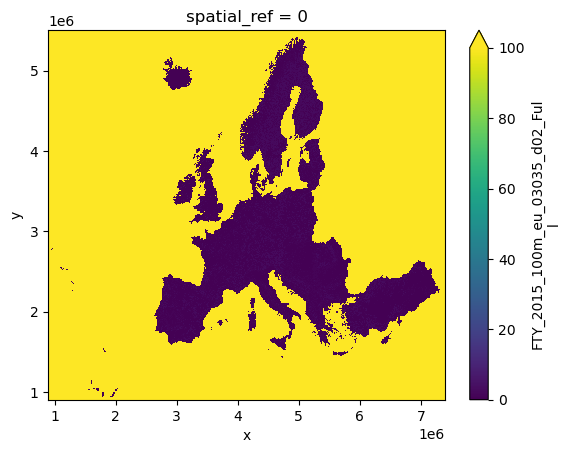

In [20]:
%%time
downsampled_cube = fty.isel(
    x=slice(None, None, 100),
    y=slice(None, None, 100),
)
downsampled_cube.FTY_2015_100m_eu_03035_d02_Full.plot(vmin=0, vmax=100)

CPU times: user 2.01 s, sys: 384 ms, total: 2.39 s
Wall time: 1.18 s


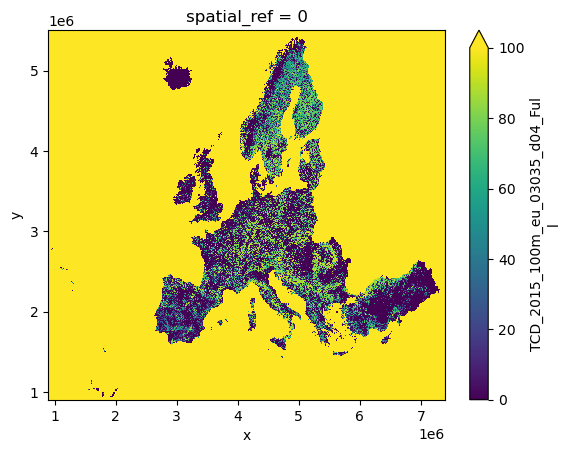

In [21]:
%%time
downsampled_cube = tcd.isel(
    x=slice(None, None, 100),
    y=slice(None, None, 100),
)
downsampled_cube.TCD_2015_100m_eu_03035_d04_Full.plot(vmin=0, vmax=100)

Execute the following command to terminate the preload job and trigger the cleanup process to clean the `downloads` directory. This step is only necessary if the preload job was originally run with `cleanup=False`, as downloads will not be removed automatically in that case. If `cleanup=True` was used (which is the default), the cleanup is performed automatically upon completion of the preload job.

In [22]:
handle1.close()
handle1

Data ID                                                  Status    Progress    Message                Exception
-------------------------------------------------------  --------  ----------  ---------------------  -----------
tree-cover-density-2015|TCD_2015_100m_eu_03035_d04_Full  STOPPED   100%        Cleaning up Finished.  -
forest-type-2015|FTY_2015_100m_eu_03035_d02_Full         STOPPED   100%        Cleaning up Finished.  -